# EDA

## Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.api.types import CategoricalDtype

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, precision_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [76]:
# test dataset
df_train = pd.read_csv("train.csv")
df_train = df_train.drop('Id', axis = 1) # Drop ID from dataset

# print data info
print("dataset shape:", df_train.shape)
print("\nInfo:")
print(df_train.info())

print("\nDescribe:")
print(df_train.describe())



dataset shape: (1460, 80)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460

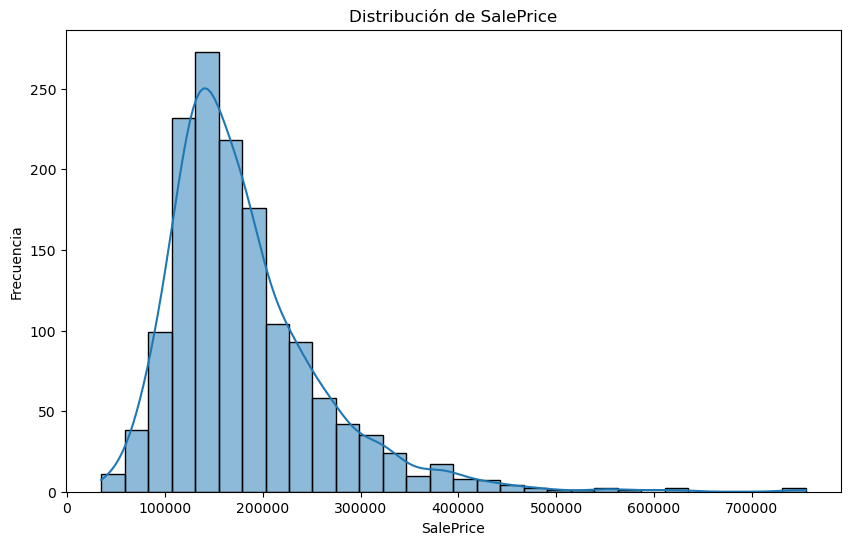

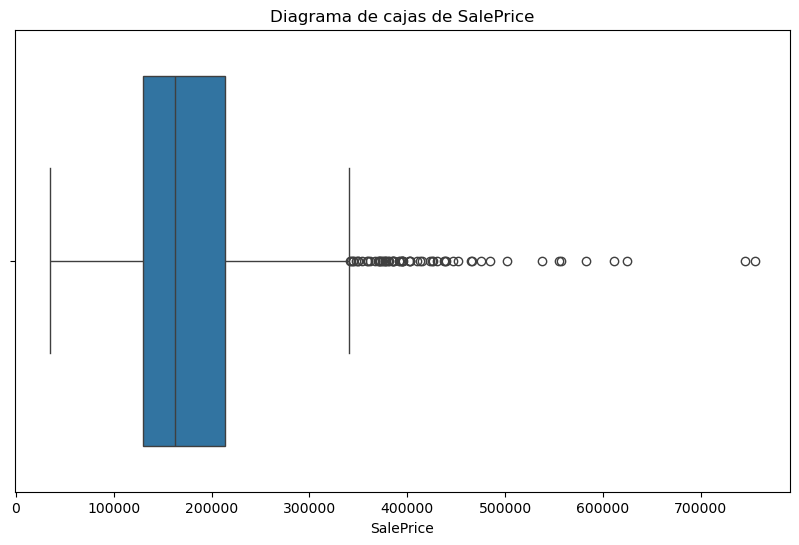

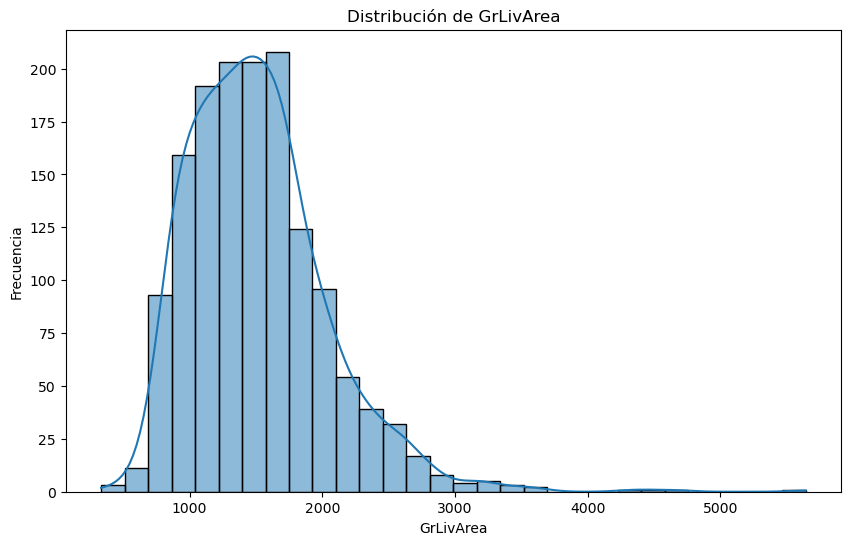

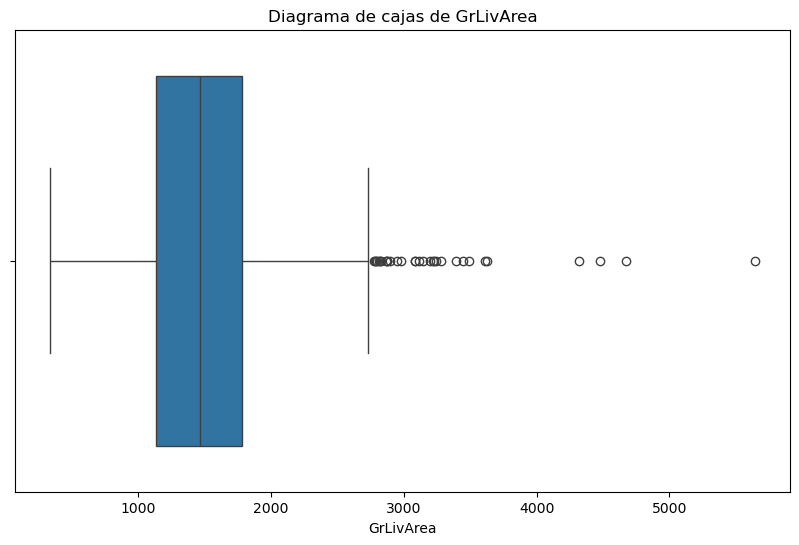

In [77]:
# Histograma de la variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=30)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de cajas (boxplot) de la variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['SalePrice'])
plt.title('Diagrama de cajas de SalePrice')
plt.xlabel('SalePrice')
plt.show()

# Opcional: Mostrar distribución de otra variable numérica, por ejemplo 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['GrLivArea'], kde=True, bins=30)
plt.title('Distribución de GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frecuencia')
plt.show()

# Opcional: Diagrama de cajas para 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['GrLivArea'])
plt.title('Diagrama de cajas de GrLivArea')
plt.xlabel('GrLivArea')
plt.show()


In [78]:
# Missing values
missing = df_train.isnull().sum()
missing_percent = (missing / df_train.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print("Missing values per column:")
print(missing_df.sort_values(by='Missing %', ascending=False))

# Correlation matrix
df_numeric = df_train.select_dtypes(include = ['float64', 'int64'])
corr_matrix = df_numeric.corr()

saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nSalePrice correlations:")
print(saleprice_corr)

# outliers
def outlier_analysis(series, variable_name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    total = series.shape[0]
    percent_outliers = 100 * outliers.shape[0] / total
    print(f"\nOutliers for {variable_name}:")
    print(f"  Total observations: {total}")
    print(f"  Number of outliers: {outliers.shape[0]}")
    print(f"  Outliers %: {percent_outliers:.2f}%")
    print(f"  Min value outliers: {outliers.min()}")
    print(f"  Max value outliers: {outliers.max()}")

# SalePrice outliers 
outlier_analysis(df_train['SalePrice'], 'SalePrice')

Missing values per column:
             Missing Count  Missing %
PoolQC                1453  99.520548
MiscFeature           1406  96.301370
Alley                 1369  93.767123
Fence                 1179  80.753425
MasVnrType             872  59.726027
...                    ...        ...
Heating                  0   0.000000
HeatingQC                0   0.000000
MSZoning                 0   0.000000
1stFlrSF                 0   0.000000
SalePrice                0   0.000000

[80 rows x 2 columns]

SalePrice correlations:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
O

### Numerical Feature Analysis

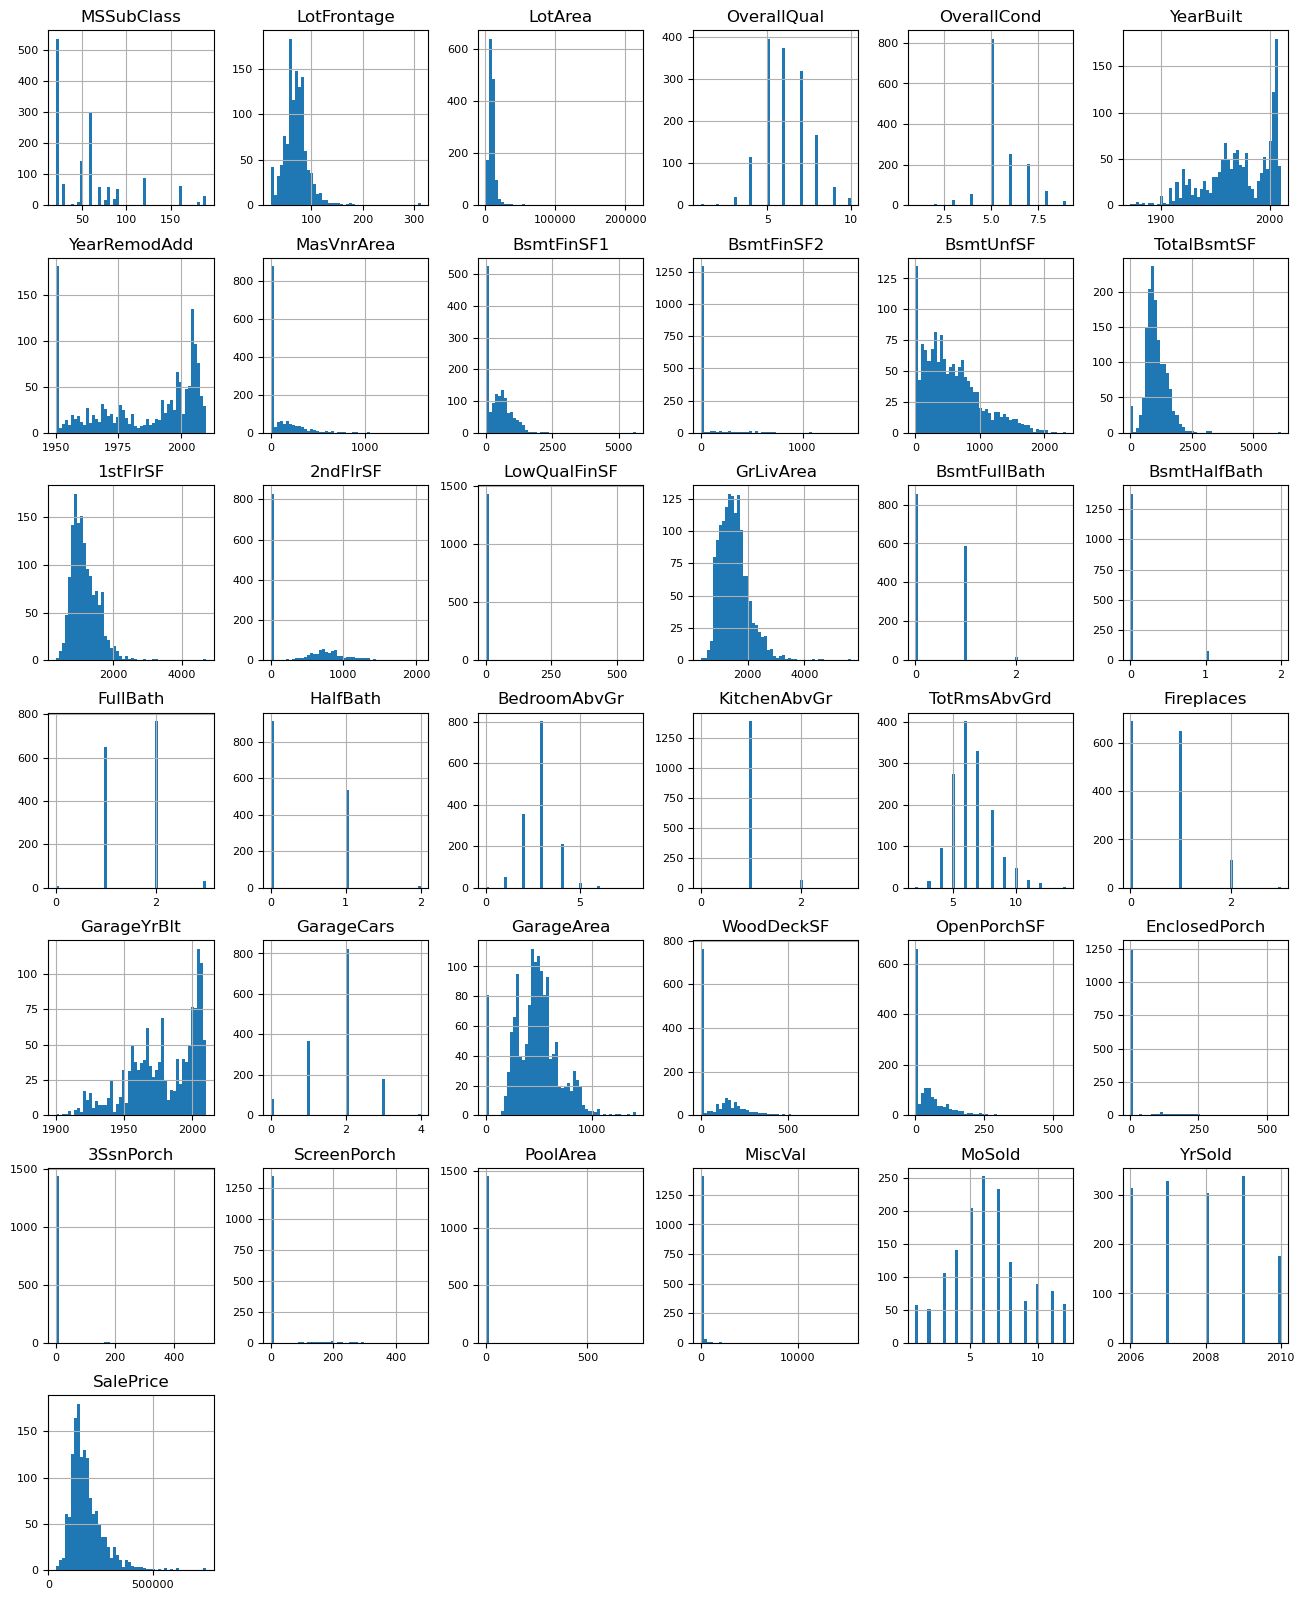

In [79]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Categorical Feature Analysis

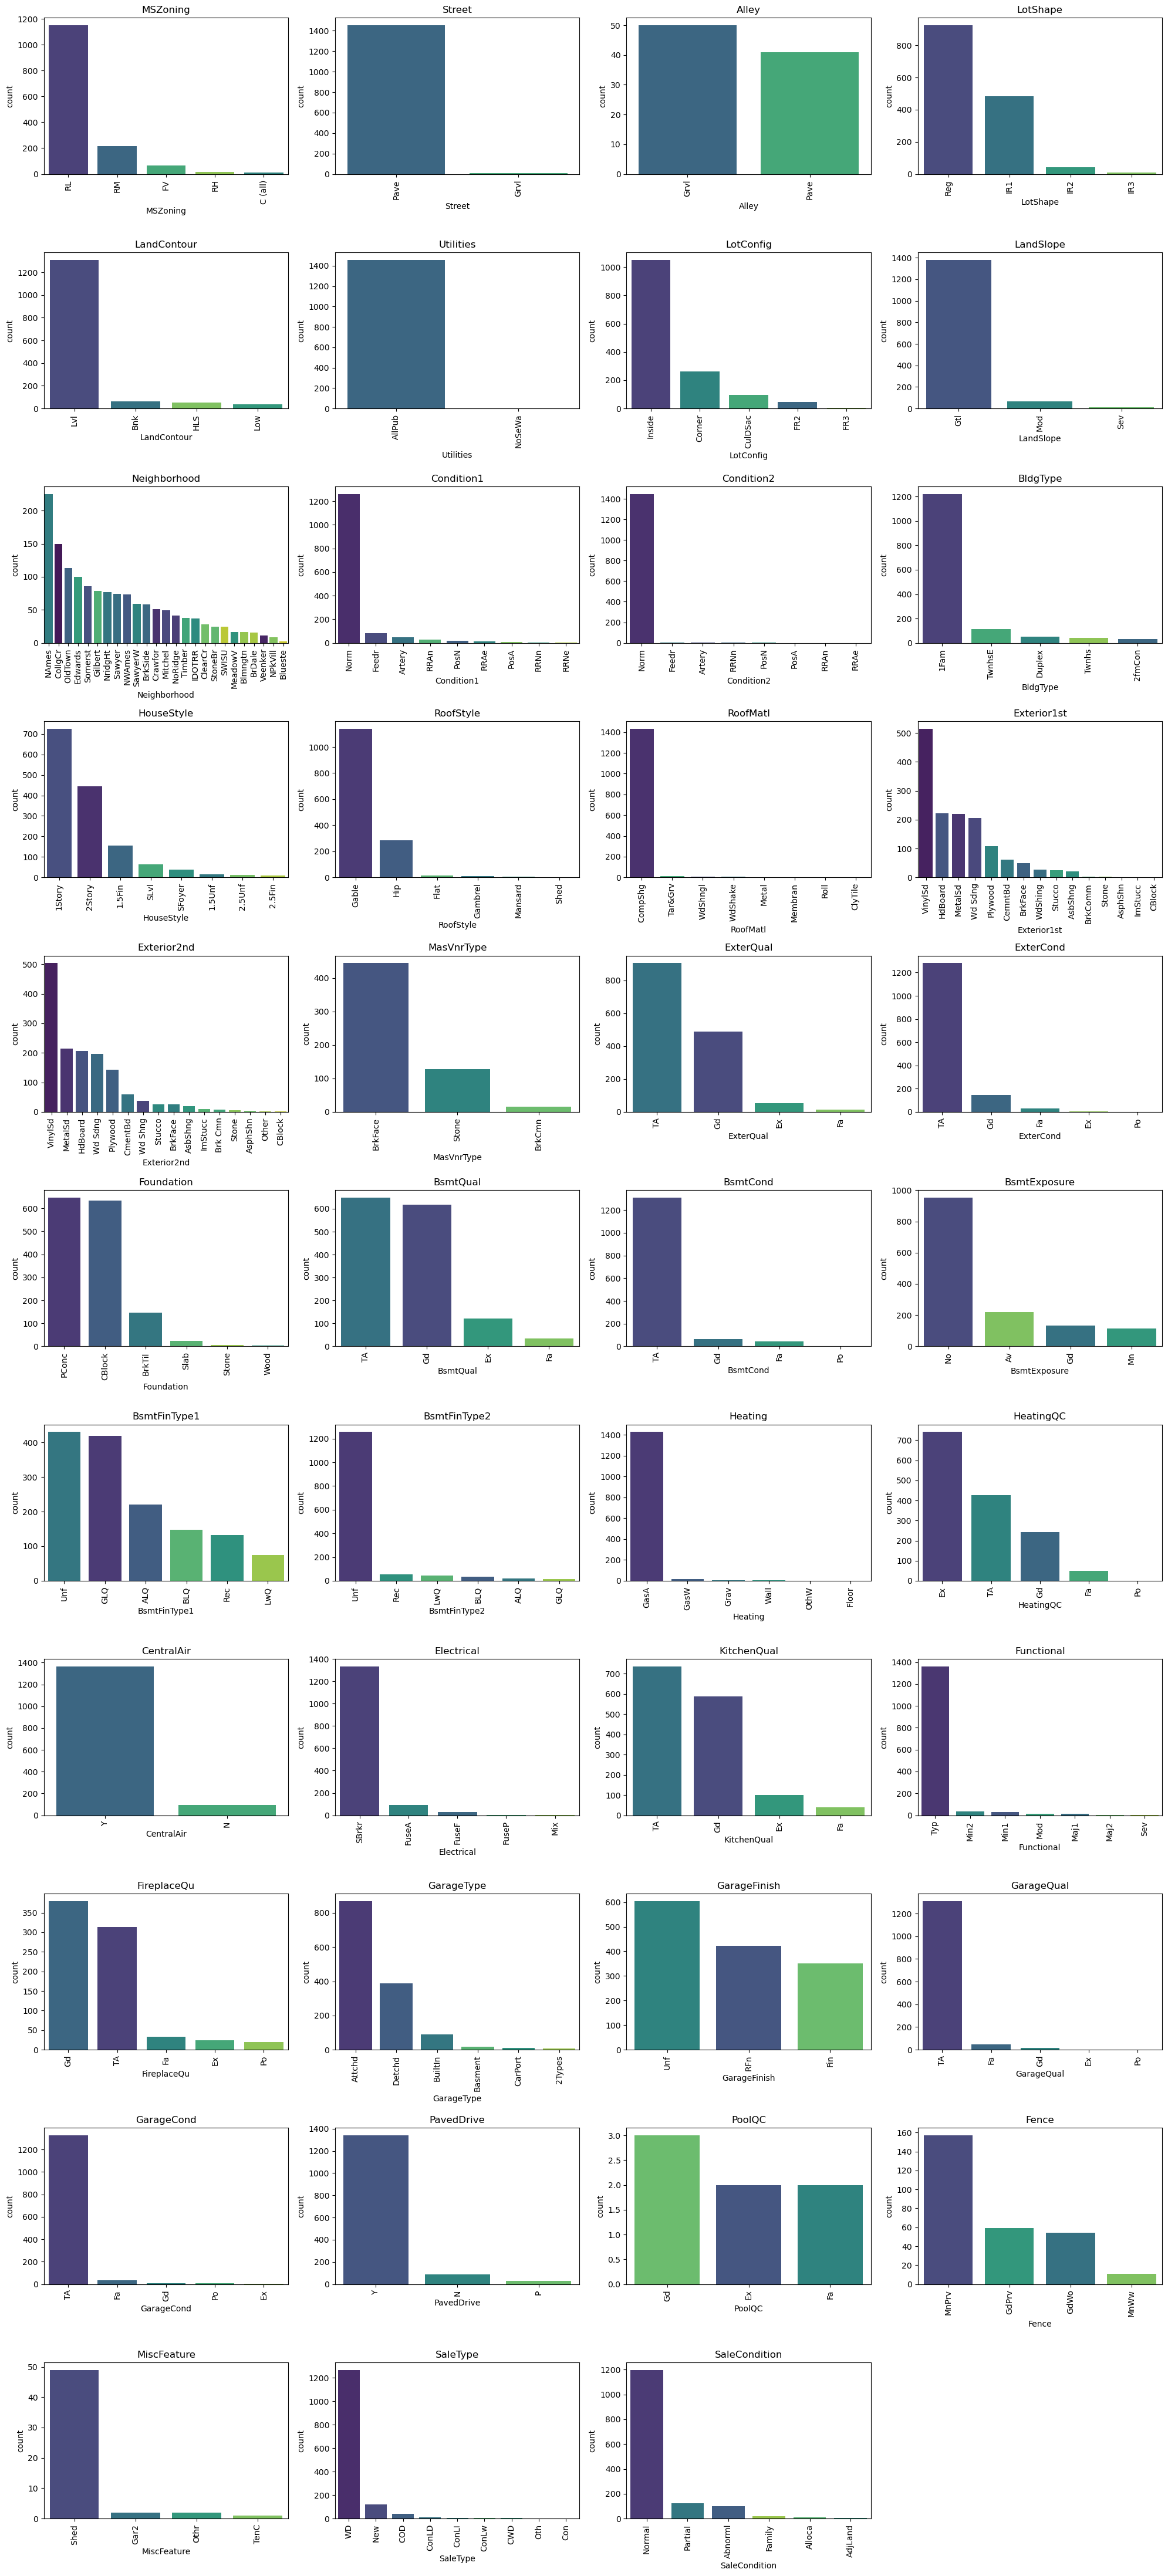

In [80]:
# Select categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns

# Determine grid size
num_features = len(categorical_features)
num_cols = 4  # Adjust this for better layout
num_rows = math.ceil(num_features / num_cols)

# Create subplots
plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, hue=df_train[col], 
                  palette="viridis", legend=False)  # Set `hue=x` and disable legend
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation with SalePrice

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [84]:
# Correlation matrix
df_numeric = df_train.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nSalePrice correlations:")
print(saleprice_corr)


SalePrice correlations:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePri

## Check Multicollinearity with VIF

In [85]:
# numeric values
df_numeric = df_train.select_dtypes(include=[np.number]).drop(columns=["SalePrice"], errors="ignore")

# Missing values

## delete columns with more than 90% missing values
threshold = 0.9  
missing_percent = df_numeric.isnull().mean()
df_cleaned = df_numeric.loc[:, missing_percent < threshold]

# replace na with median values
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# VIF
vif_data_cleaned = pd.DataFrame()
vif_data_cleaned["Variable"] = df_cleaned.columns
vif_data_cleaned["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(len(df_cleaned.columns))]

# results
print("VIF:")
print(vif_data_cleaned)

VIF:
         Variable           VIF
0      MSSubClass  4.648665e+00
1     LotFrontage  1.733722e+01
2         LotArea  2.646056e+00
3     OverallQual  6.659442e+01
4     OverallCond  4.167002e+01
5       YearBuilt  2.128391e+04
6    YearRemodAdd  2.241501e+04
7      MasVnrArea  1.841908e+00
8      BsmtFinSF1           inf
9      BsmtFinSF2           inf
10      BsmtUnfSF           inf
11    TotalBsmtSF           inf
12       1stFlrSF           inf
13       2ndFlrSF           inf
14   LowQualFinSF           inf
15      GrLivArea           inf
16   BsmtFullBath  3.694839e+00
17   BsmtHalfBath  1.219137e+00
18       FullBath  2.667944e+01
19       HalfBath  3.419317e+00
20   BedroomAbvGr  3.108438e+01
21   KitchenAbvGr  3.752022e+01
22   TotRmsAbvGrd  8.344719e+01
23     Fireplaces  3.018918e+00
24    GarageYrBlt  2.251703e+04
25     GarageCars  3.680061e+01
26     GarageArea  3.218701e+01
27     WoodDeckSF  1.905146e+00
28    OpenPorchSF  1.825919e+00
29  EnclosedPorch  1.447168e+00
30 

C:\Users\amali\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [97]:
vif_data_cleaned["VIF"] = round(vif_data_cleaned["VIF"])
vif_data_cleaned[vif_data_cleaned["VIF"] <= 5]

,Variable,VIF
0,MSSubClass,5.0
2,LotArea,3.0
7,MasVnrArea,2.0
16,BsmtFullBath,4.0
17,BsmtHalfBath,1.0
19,HalfBath,3.0
23,Fireplaces,3.0
27,WoodDeckSF,2.0
28,OpenPorchSF,2.0
29,EnclosedPorch,1.0


## Correlation Matrix

Only including variables with high correlation

In [86]:
# correlation matrix
correlation_matrix = df_cleaned.corr().abs()

# variables with high correlation
high_correlation_vars = (correlation_matrix > 0.5).sum() > 1
selected_vars = correlation_matrix.loc[high_correlation_vars, high_correlation_vars]
num_selected_vars = selected_vars.shape[0]

selected_var_names = selected_vars.columns.tolist()
num_selected_vars, selected_var_names


(16,
 ['OverallQual',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'TotRmsAbvGrd',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea'])

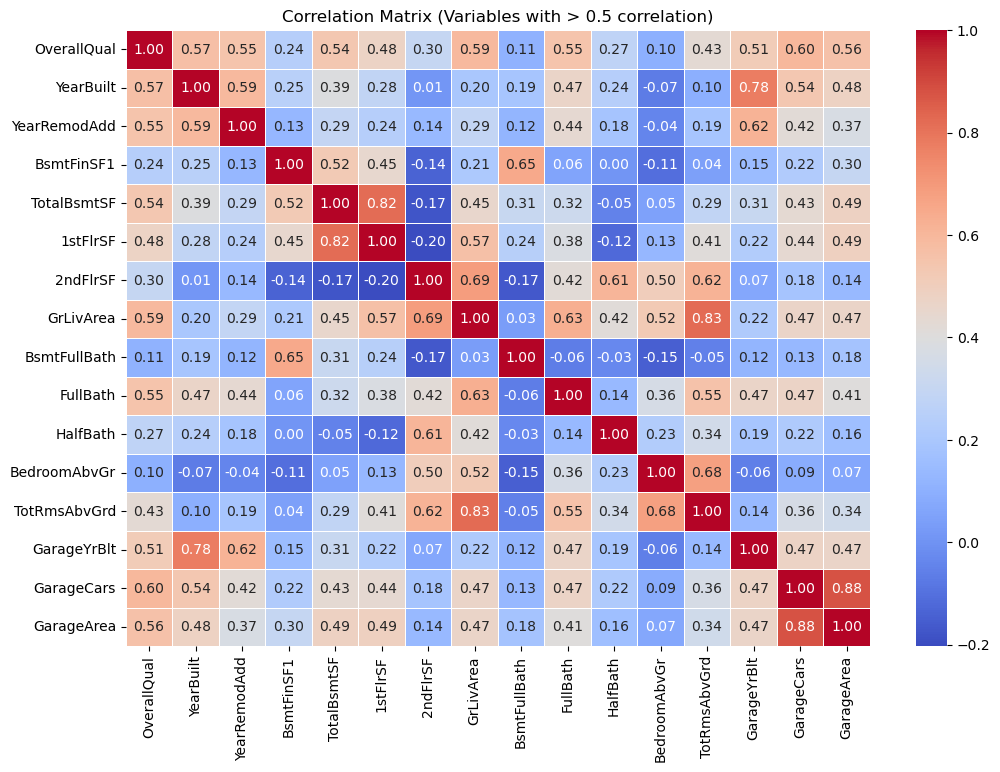

In [87]:
# new data fram
df_corr_selected = df_cleaned[selected_var_names]

# correlation matrix
corr_matrix_selected = df_corr_selected.corr()

# plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Variables with > 0.5 correlation)")
plt.show()


### Delete variables with high correlation

In [73]:
df_reduced = df_corr_selected.copy()

threshold = 0.8

# new correlation matrix
corr_matrix_upper = corr_matrix_selected.where(np.triu(np.ones(corr_matrix_selected.shape), k=1).astype(bool))

# high correlation variables
to_drop = [column for column in corr_matrix_upper.columns if any(corr_matrix_upper[column] > threshold)]

# delete variables
df_reduced.drop(columns=to_drop, inplace=True)

# Mostrar las variables eliminadas y las variables restantes
print(f"Variables deleted because high correlation (> {threshold}): {to_drop}")
print(f"Variables selected after elimination: {df_reduced.columns.tolist()}")


Variables deleted because high correlation (> 0.8): ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
Variables selected after elimination: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageYrBlt', 'GarageCars']


## Check linear (or not) relationships

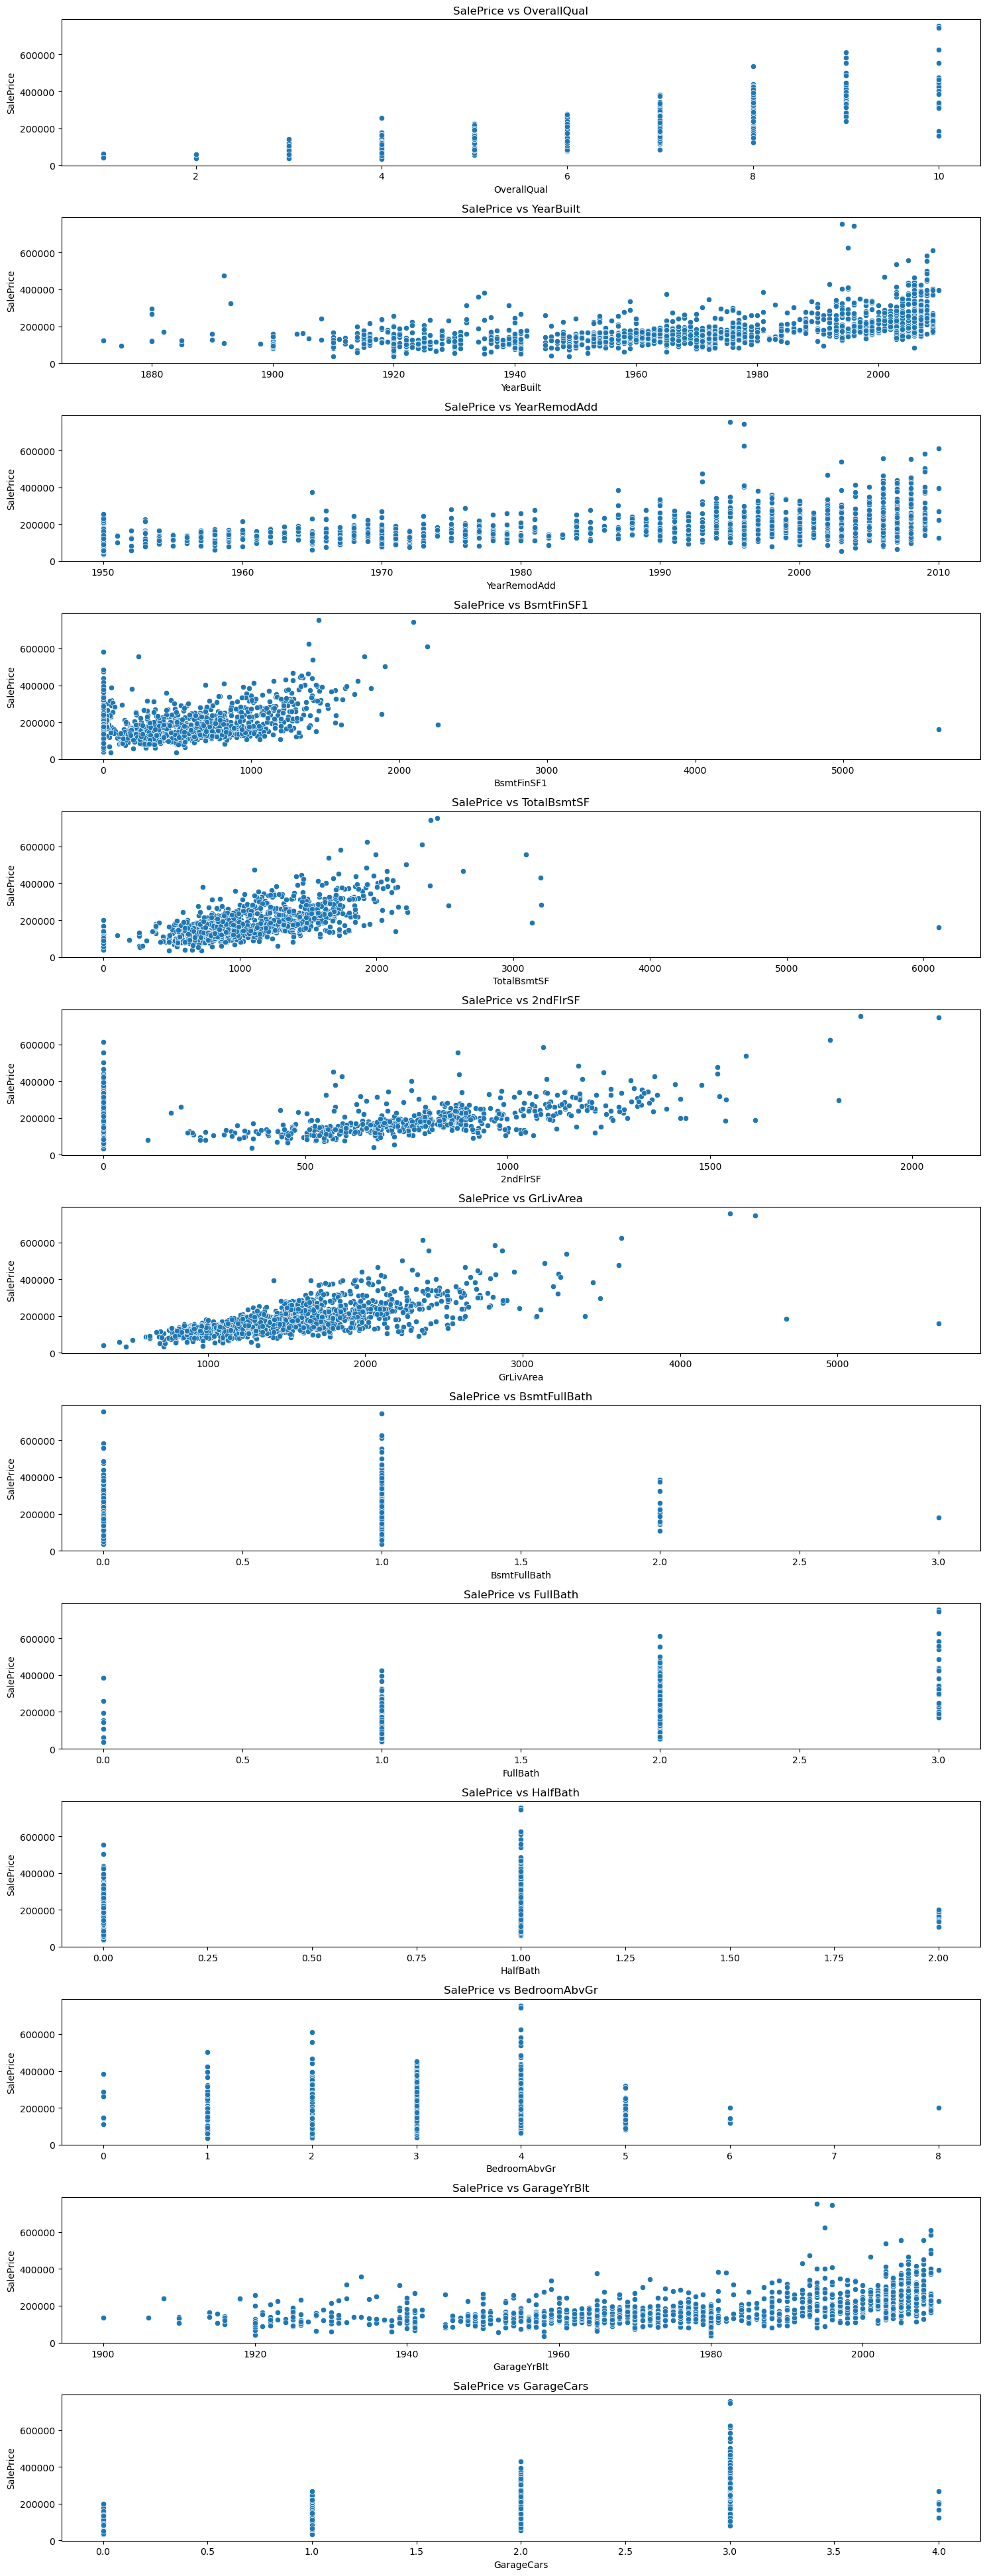

In [67]:
# Add SalePrice to the reduced dataset
df_plot = df_cleaned.copy()
df_plot["SalePrice"] = df_train["SalePrice"]  

# key variables
key_variables = df_reduced.columns.tolist()  

# Plot all variables
num_vars = len(key_variables)
plt.figure(figsize=(15, num_vars * 3)) 

for i, var in enumerate(key_variables):
    plt.subplot(num_vars, 1, i+1)
    sns.scatterplot(x=df_plot[var], y=df_plot["SalePrice"])
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.title(f"SalePrice vs {var}")

plt.tight_layout()
plt.show()


## Linear Regression

In [68]:
# linear regression

# select variables
linear_vars = ["OverallQual", "TotalBsmtSF", "GrLivArea", "GarageCars", "GarageArea"]

# X and y
X = df_cleaned[linear_vars]
y = df_train["SalePrice"]  

# add constant
X = sm.add_constant(X)

# model
model = sm.OLS(y, X).fit()

# results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     926.5
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:27:19   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.907e+04   4638.450    -21.359      

## Transformations

In [69]:
# logarithmic transformation
log_vars = ["GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea", "2ndFlrSF"]
df_transformed = df_cleaned.copy()
df_transformed[log_vars] = np.log1p(df_transformed[log_vars])

# categorical variables
categorical_vars = ["FullBath", "HalfBath", "BedroomAbvGr", "BsmtFullBath"]
df_transformed[categorical_vars] = df_transformed[categorical_vars].astype(str)  

print(df_transformed.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  WoodDeckSF  \
0          2003       196.0         706  ...    6.308098           0   
1          1976         0.0         978  ...    6.133398         298   
2          2002       162.0         486  ...    6.411818           0   
3          1970         0.0         216  ...    6.466145           0   
4          2000       350.0         655  ...    6.729824         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea MiscVal  \
0          

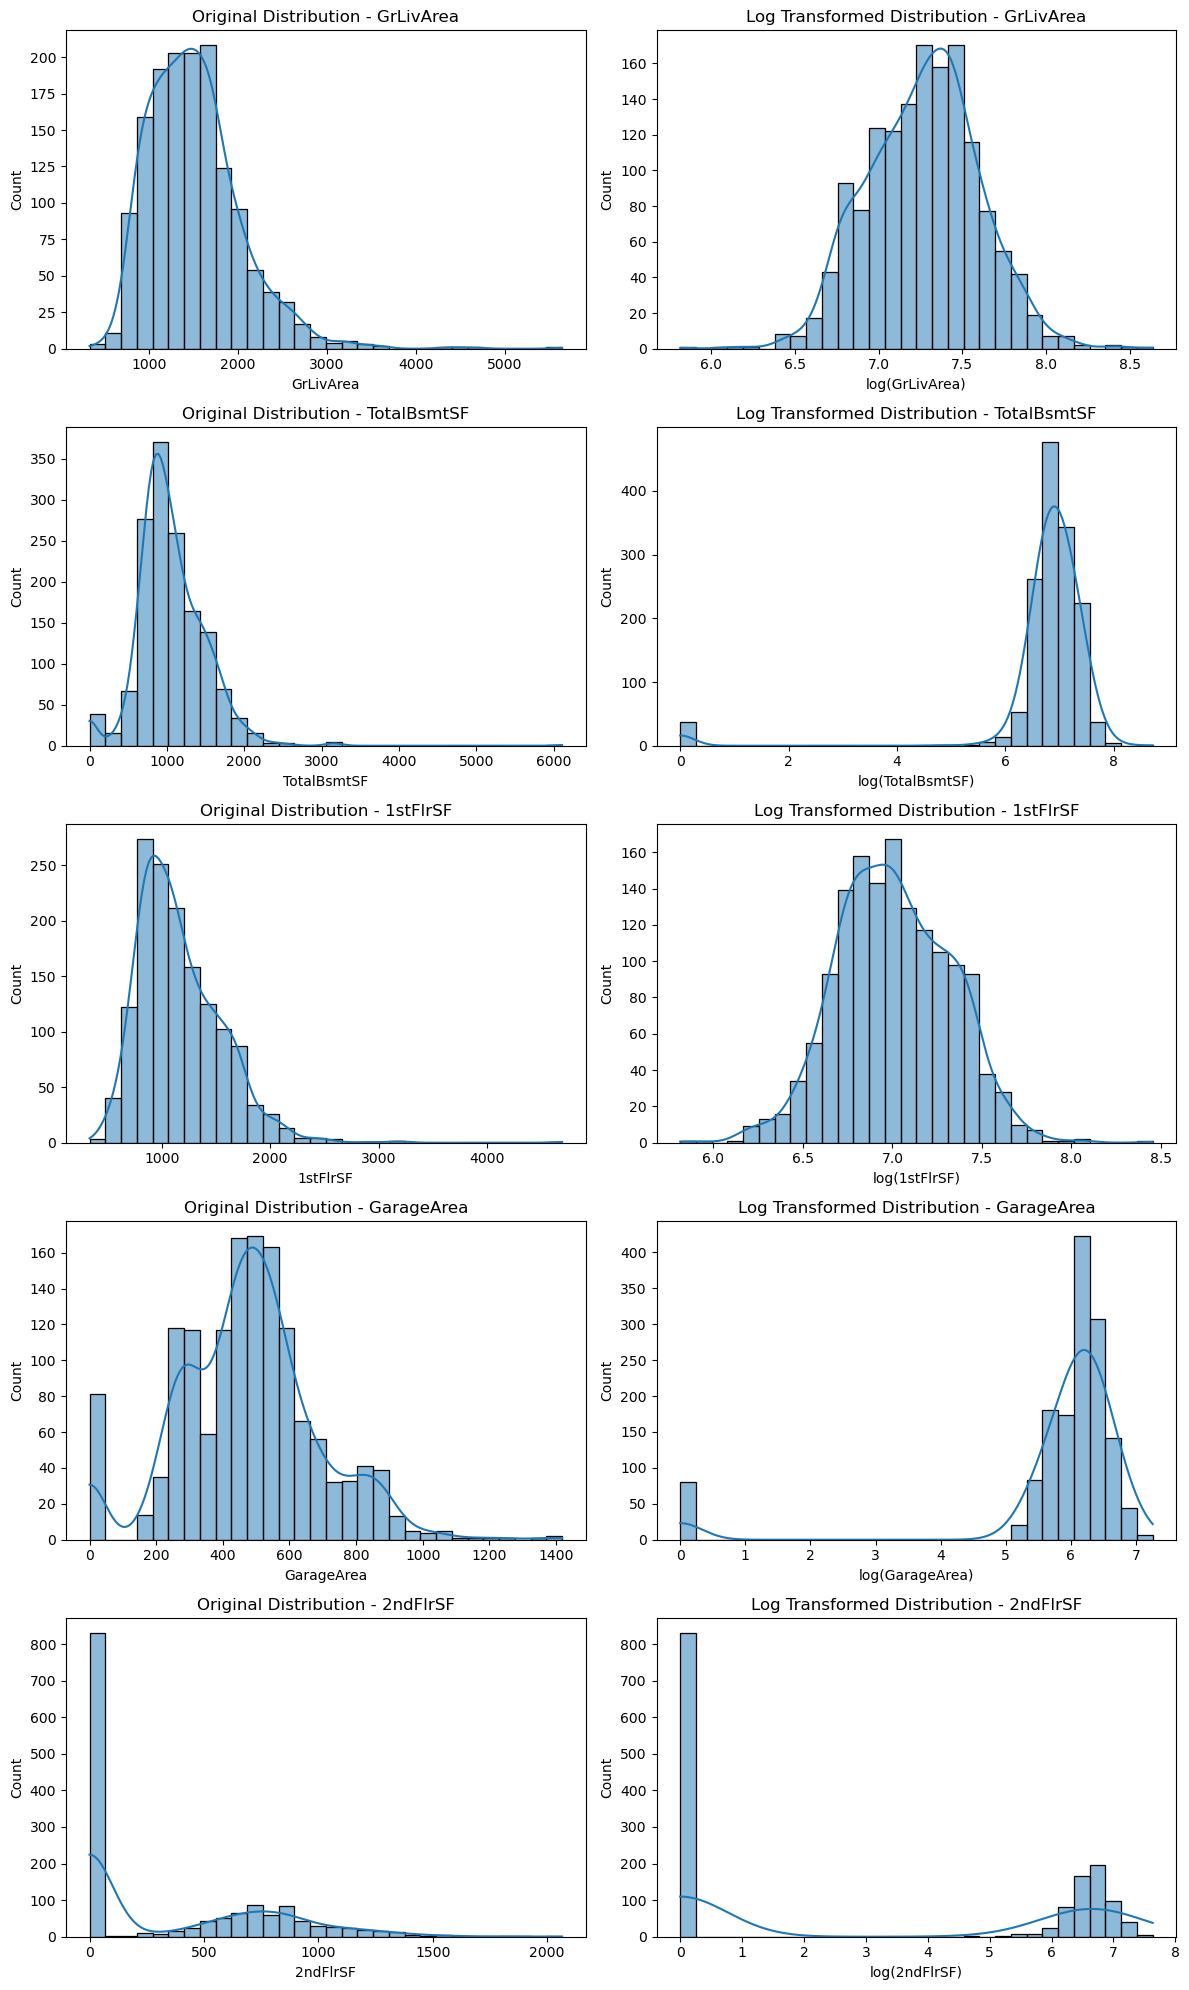

In [ ]:
# trnasformed variables
log_vars = ["GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea", "2ndFlrSF"]

#plot
fig, axes = plt.subplots(len(log_vars), 2, figsize=(12, len(log_vars) * 4))

for i, var in enumerate(log_vars):
    # histogram before transformation
    sns.histplot(df_cleaned[var], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Distribution - {var}")
    axes[i, 0].set_xlabel(var)

    # histogram after transformation
    sns.histplot(df_transformed[var], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Log-Transformed - {var}")
    axes[i, 1].set_xlabel(f"log({var})")

plt.tight_layout()
plt.show()


## PCA

In [71]:
# numeric values
df_pca = df_transformed.select_dtypes(include=[np.number])

# standardize
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# PCA
pca = PCA(n_components=0.95)  #95 variance
principal_components = pca.fit_transform(df_pca_scaled)

# varaince explained by PC
explained_variance = pca.explained_variance_ratio_
print("Variance explained by each principal component:", explained_variance)


Variance explained by each principal component: [0.1731036  0.07397719 0.06832398 0.05030707 0.04334053 0.03699772
 0.03595618 0.03413447 0.03341865 0.03261448 0.03236813 0.03072648
 0.03003418 0.02968232 0.02777559 0.02689028 0.02655823 0.02552818
 0.024439   0.02276577 0.02203543 0.02155804 0.01981036 0.01880605
 0.0146582 ]


## Second Regression

In [72]:
# new regression variables
linear_vars_refined = ["OverallQual", "TotalBsmtSF", "GrLivArea", "GarageCars"]

# X and y
X_refined = df_transformed[linear_vars_refined]
y = df_train["SalePrice"] 

# add constant
X_refined = sm.add_constant(X_refined)

# model
model_refined = sm.OLS(y, X_refined).fit()

print(model_refined.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     953.3
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:28:15   Log-Likelihood:                -17605.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1455   BIC:                         3.525e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.62e+05   2.81e+04    -20.013      

## Check again for multicollinearity

In [73]:
# evaluate multicollinearity with VIF

# VIF
vif_data_refined = pd.DataFrame()
vif_data_refined["Variable"] = X_refined.columns
vif_data_refined["VIF"] = [variance_inflation_factor(X_refined.values, i) for i in range(len(X_refined.columns))]

print(vif_data_refined)


      Variable         VIF
0        const  658.749398
1  OverallQual    2.109442
2  TotalBsmtSF    1.134645
3    GrLivArea    1.673908
4   GarageCars    1.630814


## PCA for transformed variables

In [58]:
# numeric variables
df_pca_final = df_transformed.select_dtypes(include=[np.number])

# standarize
scaler = StandardScaler()
df_pca_scaled_final = scaler.fit_transform(df_pca_final)

# PCA 95% variance
pca_final = PCA(n_components=0.95)
principal_components_final = pca_final.fit_transform(df_pca_scaled_final)

explained_variance_final = pca_final.explained_variance_ratio_
print("Explained variance for each PC:", explained_variance_final)

df_pca_model = pd.DataFrame(principal_components_final, columns=[f"PC{i+1}" for i in range(principal_components_final.shape[1])])

# PCA Regression
X_pca = sm.add_constant(df_pca_model)
model_pca = sm.OLS(y, X_pca).fit()

# results
print(model_pca.summary())


Explained variance for each PC: [0.19213649 0.08657112 0.06568274 0.04752454 0.04126779 0.03638704
 0.03393222 0.03221354 0.03151133 0.03100741 0.03051922 0.0292235
 0.0283463  0.02801327 0.02626878 0.02548507 0.02509043 0.02423405
 0.02332688 0.02162701 0.02108184 0.02035117 0.01873347 0.01811844
 0.01383073]
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     202.5
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:45:41   Log-Likelihood:                -17441.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1434   BIC:                         3.507e+04
Df Model:                          25                   

## Data Preprocessing pipeline for Predictive Modelling

In [158]:
# Load dataset
df_train = pd.read_csv("train.csv")

df_train = df_train.drop('Id', axis = 1) # Drop ID column
df_train['log(SalePrice)'] = np.log1p(df_train["SalePrice"]) # Log transformation of target variable = 'SalePrice'
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   Alley           91 non-null     object 
 6   LotShape        1460 non-null   object 
 7   LandContour     1460 non-null   object 
 8   Utilities       1460 non-null   object 
 9   LotConfig       1460 non-null   object 
 10  LandSlope       1460 non-null   object 
 11  Neighborhood    1460 non-null   object 
 12  Condition1      1460 non-null   object 
 13  Condition2      1460 non-null   object 
 14  BldgType        1460 non-null   object 
 15  HouseStyle      1460 non-null   object 
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i

In [159]:
## delete columns with more than 90% missing values
threshold = 0.9  
missing_percent = df_train.isnull().mean()
df_cleaned = df_train.loc[:, missing_percent < threshold]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   int64  
 16  OverallCond     1460 non-null   int64  
 17  YearBuilt       1460 non-null   i

In [160]:
# Handle multi-collinearity

# Define target variables
target_vars = ["SalePrice", "log(SalePrice)"]

# numeric values
df_numeric = df_cleaned.select_dtypes(include=[np.number]).drop(columns=target_vars, errors="ignore")

# Compute absolute correlation matrix, excluding target variables
correlation_matrix = df_numeric.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate comparisons
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns that have a correlation higher than threshold
threshold = 0.6
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated columns, ensuring target variables are kept
df_cleaned = df_cleaned.drop(columns=to_drop, errors="ignore")

# Print dropped columns
print(f"Dropped {len(to_drop)} highly correlated columns: {to_drop}")


Dropped 9 highly correlated columns: ['1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [161]:
# Separate features and target
X = df_cleaned.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_cleaned["log(SalePrice)"]

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Categorical variables: Fill missing values
if categorical_features.any():
    imputer = SimpleImputer(strategy="most_frequent")
    df_cleaned.loc[:, categorical_features] = imputer.fit_transform(df_cleaned[categorical_features])

# Numerical variables: Median imputation
if numerical_features.any():
    imputer = SimpleImputer(strategy="median")
    df_cleaned.loc[:, numerical_features] = imputer.fit_transform(df_cleaned[numerical_features])

print(df_cleaned.info())

# Label encoding for categorical variables
if categorical_features.any():
    label_encoder = LabelEncoder()
    for col in categorical_features:
        df_cleaned.loc[:, col] = label_encoder.fit_transform(df_cleaned[col])

# Standardizing numerical variables
if numerical_features.any():
    scaler = StandardScaler()
    df_cleaned.loc[:, numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

Categorical Features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPo

In [162]:
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log(SalePrice)
0,0.073375,3,-0.220875,-0.207142,1,3,3,0,4,0,...,-0.270208,-0.068692,2,-0.087688,-1.599111,0.138777,8,4,208500,12.247699
1,-0.872563,3,0.460320,-0.091886,1,3,3,0,2,0,...,-0.270208,-0.068692,2,-0.087688,-0.489110,-0.614439,8,4,181500,12.109016
2,0.073375,3,-0.084636,0.073480,1,0,3,0,4,0,...,-0.270208,-0.068692,2,-0.087688,0.990891,0.138777,8,4,223500,12.317171
3,0.309859,3,-0.447940,-0.096897,1,0,3,0,0,0,...,-0.270208,-0.068692,2,-0.087688,-1.599111,-1.367655,8,0,140000,11.849405
4,0.073375,3,0.641972,0.375148,1,0,3,0,2,0,...,-0.270208,-0.068692,2,-0.087688,2.100892,0.138777,8,4,250000,12.429220


### Factor Analysis

In [164]:
# Apply Factor Analysis
n_factors = 10  # Choose based on variance explained
fa = FactorAnalysis(n_components=n_factors, random_state=42)

X = df_cleaned.drop(["SalePrice","log(SalePrice)"], axis=1)
X_fa = fa.fit_transform(X)

# Check explained variance
explained_variance = np.sum(fa.components_**2, axis=1)
print(f"Explained Variance by Factors:\n{explained_variance}")


Explained Variance by Factors:
[ 4.61187701  3.81975971  1.67233944  6.55975328 31.85739743  4.23263996
 17.28098634  3.13096271  1.4274342   0.98587393]


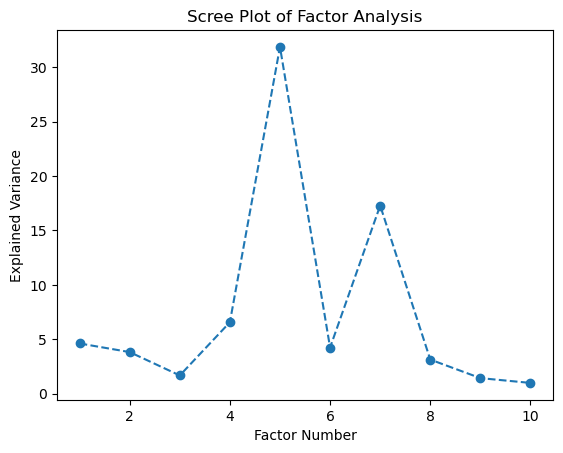

In [165]:
plt.plot(range(1, n_factors + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Factor Number")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of Factor Analysis")
plt.show()


### Lasso Regression

LASSO Selected Features (Sorted by Importance):
OverallQual: 0.1301
TotalBsmtSF: 0.0682
2ndFlrSF: 0.0677
YearBuilt: 0.0471
Fireplaces: 0.0426
CentralAir: 0.0392
OverallCond: 0.0374
PavedDrive: 0.0325
BedroomAbvGr: 0.0301
YearRemodAdd: 0.0277
BsmtQual: -0.0253
Foundation: 0.0245
LotArea: 0.0239
KitchenQual: -0.0238
SaleCondition: 0.0214
RoofMatl: 0.0198
GarageFinish: -0.0197
MSSubClass: -0.0195
BsmtFinSF1: 0.0185
ScreenPorch: 0.0179
WoodDeckSF: 0.0174
BsmtExposure: -0.0120
KitchenAbvGr: 0.0116
BsmtFinType1: -0.0092
PoolArea: -0.0091
HeatingQC: -0.0089
MSZoning: -0.0089
YrSold: -0.0080
ExterCond: 0.0077
Condition2: -0.0074
BldgType: -0.0070
RoofStyle: 0.0068
MasVnrArea: 0.0068
3SsnPorch: 0.0066
LotShape: -0.0063
EnclosedPorch: 0.0062
BsmtFinSF2: 0.0056
SaleType: -0.0048
Exterior1st: -0.0036
LowQualFinSF: 0.0035
Exterior2nd: 0.0031
MiscVal: -0.0029
HouseStyle: -0.0028
LandContour: 0.0024
Neighborhood: 0.0022
Functional: 0.0019
Electrical: 0.0018
BsmtCond: 0.0016
LotConfig: -0.0010
BsmtHal

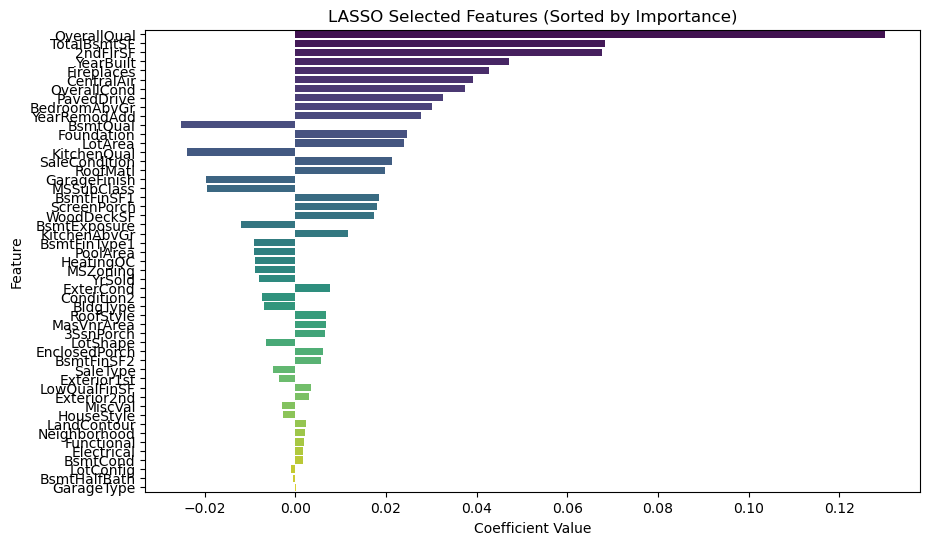

In [166]:
# Feature Selection Using LASSO (L1 Regularization)
# LASSO (Least Absolute Shrinkage and Selection Operator) sets some coefficients to zero, effectively selecting only the most important features.
X_scaled = X
# Apply LASSO with Cross-Validation
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_scaled, y)

# Select non-zero coefficients
non_zero_mask = lasso.coef_ != 0
selected_features = np.array(X.columns)[non_zero_mask]
coefficients = lasso.coef_[non_zero_mask]

# Sort features by absolute coefficient value (highest to lowest)
sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # Sort descending
sorted_features = selected_features[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print sorted features with coefficients
print("LASSO Selected Features (Sorted by Importance):")
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coef:.4f}")

# Convert to DataFrame for Seaborn compatibility
lasso_df = pd.DataFrame({"Feature": sorted_features, "Coefficient": sorted_coefficients})

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", hue="Feature", data=lasso_df, palette="viridis", legend=False)
plt.title("LASSO Selected Features (Sorted by Importance)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [173]:
# Separate target variable
X = df_cleaned.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_cleaned["SalePrice"]

# Define models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for Linear Regression
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and evaluate using GridSearchCV
results = []
for name, config in models.items():
    print(f"Training {name}...")
    print(f"..............................................................")

    if config["params"]:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_rmse = -grid_search.best_score_  # Convert negative RMSE to positive

        print(f"Best parameters for {name}: {best_params}")
        
    else:  # For Linear Regression (no hyperparameters)
        best_model = config["model"].fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        best_rmse = mean_squared_error(y_test, y_pred, squared=False)
        best_params = "N/A"

    # Evaluate on test set
    y_pred_test = best_model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "CV RMSE": best_rmse,
        "Test RMSE": test_rmse
    })

    print(f"Test RMSE for {name}: {test_rmse}")
    print(f"CV RMSE for {name}: {best_rmse}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test RMSE")
print(results_df)

Training Linear Regression...
..............................................................
Test RMSE for Linear Regression: 35998.700403349896
CV RMSE for Linear Regression: 35998.700403349896

Training Decision Tree...
..............................................................
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Test RMSE for Decision Tree: 38343.34705777359
CV RMSE for Decision Tree: 44413.186387220696

Training Random Forest...
..............................................................
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE for Random Forest: 30267.914941643663
CV RMSE for Random Forest: 32210.08238699847

Training Gradient Boosting...
..............................................................
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test RMSE for Gradient Boosting: 29315.50268771611
CV RMSE for Gra

In [174]:
# Separate target variable
X = df_cleaned.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_cleaned["log(SalePrice)"]

# Define models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for Linear Regression
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and evaluate using GridSearchCV
results = []
for name, config in models.items():
    print(f"Training {name}...")
    print(f"..............................................................")

    if config["params"]:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_rmse = -grid_search.best_score_  # Convert negative RMSE to positive

        print(f"Best parameters for {name}: {best_params}")
        
    else:  # For Linear Regression (no hyperparameters)
        best_model = config["model"].fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        best_rmse = mean_squared_error(y_test, y_pred, squared=False)
        best_params = "N/A"

    # Evaluate on test set
    y_pred_test = best_model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "CV RMSE": best_rmse,
        "Test RMSE": test_rmse
    })

    print(f"Test RMSE for {name}: {test_rmse}")
    print(f"CV RMSE for {name}: {best_rmse}\n")

# Convert results to DataFrame
results_df_log = pd.DataFrame(results).sort_values(by="Test RMSE")
print(results_df_log)

Training Linear Regression...
..............................................................
Test RMSE for Linear Regression: 0.15999224416859634
CV RMSE for Linear Regression: 0.15999224416859634

Training Decision Tree...
..............................................................
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Test RMSE for Decision Tree: 0.20850226131854535
CV RMSE for Decision Tree: 0.21289247520997182

Training Random Forest...
..............................................................
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE for Random Forest: 0.15200066294377662
CV RMSE for Random Forest: 0.15232553907053187

Training Gradient Boosting...
..............................................................
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Test RMSE for Gradient Boosting: 0.14372011594554998
CV RMSE f